In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

1. Находим наиболее протяженный участок для sar_3.jpg и выделяем линии при помощи преобразования Хафа

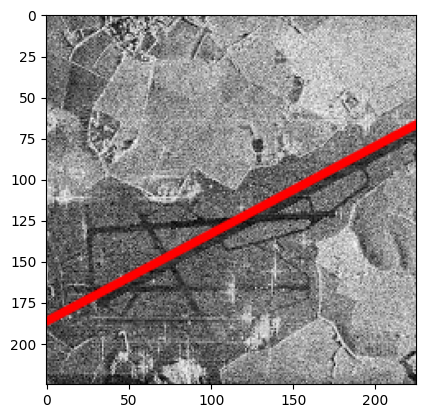

In [14]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray = cv2.GaussianBlur(image_gray, (9, 9), 2)
canny = cv2.Canny(image_gray,50,100,apertureSize = 3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 60)
import math
image_with_lines = image.copy()

if lines is not None:
    longest_line = None
    max_length = 0

    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 200*(-b)), int(y0 + 200*(a)))
        pt2 = (int(x0 - 200*(-b)), int(y0 - 200*(a)))
        length = np.sqrt((pt2[0] - pt1[0])**2 + (pt2[1] - pt1[1])**2)

        if length > max_length:
            max_length = length
            longest_line = lines[i]

    if longest_line is not None:
        rho = longest_line[0][0]
        theta = longest_line[0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 200*(-b)), int(y0 + 200*(a)))
        pt2 = (int(x0 - 200*(-b)), int(y0 - 200*(a)))
        cv2.line(image_with_lines, pt1, pt2, (255, 0, 0), 3, cv2.LINE_AA)
plt.imshow(image_with_lines)

2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [40]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

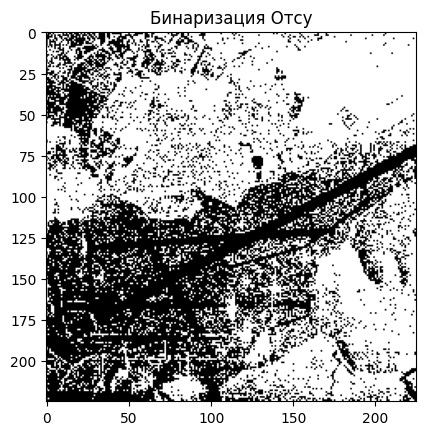

In [44]:
image_contrast = cv2.convertScaleAbs(image_gray, alpha=1.5, beta=0)#сделать изображение более контрастным
_,th2 = cv2.threshold(image_contrast,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.title('Бинаризация Отсу')
plt.imshow(th2, cmap="gray")

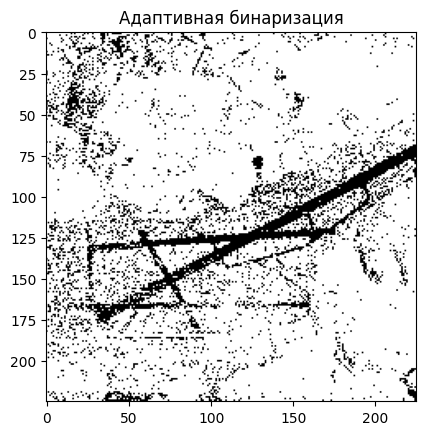

In [45]:
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,351,45)

plt.title('Адаптивная бинаризация')
plt.imshow(th3, cmap="gray")

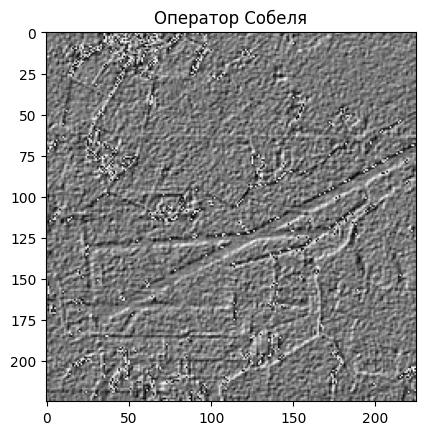

In [46]:
scale = 0.5
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)
plt.title('Оператор Собеля')
plt.imshow((grad - grad.min())*255, cmap="gray")

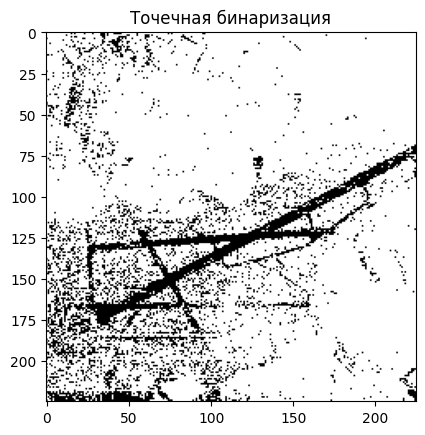

In [47]:
import copy
bin_img = copy.deepcopy(image_gray)
T = 75
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255
plt.title('Точечная бинаризация')
plt.imshow(bin_img, cmap="gray")